<a href="https://colab.research.google.com/github/devid-davops/Learning-Dask/blob/master/intro_to_dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data

### Introduction to Dask

* David Booker-Earley
* 6/1/2020
<!-- * Checkpoint 2, Module 37 -->

---

## Installation

In [1]:
!pip install --upgrade "dask[complete]"

     |████████████████████████████████| 819kB 3.4MB/s 
     |████████████████████████████████| 645kB 15.1MB/s 
     |████████████████████████████████| 501kB 19.8MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=0a67a74d5b9e54700e7be0910ab7e8fc1fdc59e2daeff80fc4169c7c5cf1a0c3
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427628 sha256=48c4c1c1f788f8f4e9d9da5a7eea5597a284e2d9369bfe68cc27b98476b7af37
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=3e432c13ac0769bd49e2ef9baf4303d682f7e210fe2e4afd34127261b34d2614
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf1

In [0]:
from dask import delayed

## Test some code.

In [52]:
@delayed
def sum(x, y):
  return x + y

@delayed
def sum_and_squared(x, y):
  return (x+y)**2

result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1,result2)

result.compute()

196

## Parallelize some code using the `@delayed` decorator of Dask, and derive the task execution graph.

### 1. Summing List Items

In [53]:
@delayed
def sum_up(v):
  '''Returns the sum of list items in list v'''
  return sum(v)

@delayed
def cube(n):
  '''Returns the cube item n.'''
  return n**3

total = []

for i in range(1,10):
  total.append(cube(i))

print(sum_up(total))

Delayed('sum_up-b0aead90-ecf3-4774-adc0-7c46263b6081')


Delayed('sum_up-41114d18-1d2c-4d79-819e-df22db6cb332')

Compute
Delayed('sum-ed5154fb-b691-4e23-a352-cc9b1dbda2ee')

Visualize


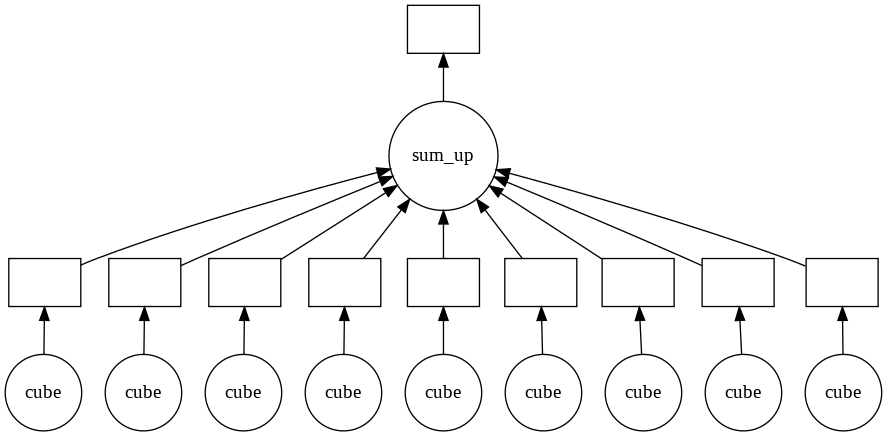

In [54]:
result = sum_up(total)

print(result)
print()
print("Compute")
print(result.compute())
print()
print("Visualize")
result.visualize()

### 2. Fibonacci Numbers

In [55]:
# First two fibonacci numbers (excluding zero)
fibonacci_nums = [1,1]

def get_nth_fibonacci_number(n):
  '''Returns the nth fibonacci number.'''
  if n == 1:
    return fibonacci_nums[0]
  elif n == 2:
    return fibonacci_nums[1]
  else:
    return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

print(get_nth_fibonacci_number(10))

55


Use `@delayed` to defer code execution, and place the function and its arguments into a task graph (lazy evaluation).

In [56]:
# First two fibonacci numbers (excluding zero)
fibonacci_nums = [1,1]

@delayed
def get_nth_fibonacci_number(n):
  '''Returns the nth fibonacci number.'''
  if n == 1:
    return fibonacci_nums[0]
  elif n == 2:
    return fibonacci_nums[1]
  else:
    return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

print(get_nth_fibonacci_number(10))

Delayed('get_nth_fibonacci_number-f73b87a4-eff0-4fce-a80f-f6a72dd9d281')


In [0]:
# Assign a variable to the function's output (via lazy evaluation)
result = get_nth_fibonacci_number(10)

In [58]:
result.compute()

Delayed('add-ef168d631b9f502bdc526834b91408d6')

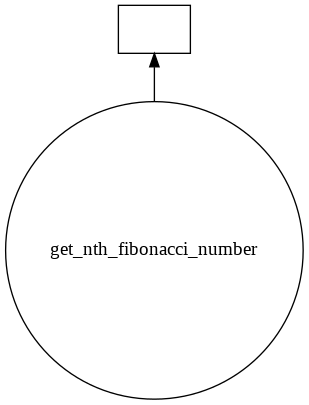

In [59]:
result.visualize()